In [1]:
# 라이브러리 설치

import pandas as pd 
import numpy as np 

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# '-' 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자 출력 형태 설정
pd.options.display.float_format = '{:.2f}'.format

# DataFrame 출력 범위 설정
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',999)

#경고무시
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
#확인하기
get_font_family()

'Malgun Gothic'

In [4]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

================================================================

# 원티드DB 국민연금 사업장 데이터
## 원티드에서 실제로 사용 중인 데이터로, 여러 회사들과 회사들이 납부한 국민연금 보험료 정보 데이터

### - 데이터 정보
 - 회사 수 : 약 5000개
 - 월별 데이터 : 직원 수, 국민연금 보험료(인원 수에 대한 상한선_최대고지금액이 존재함)
 - 년 단위 데이터: 매출액(천원 단위)
### - EDA 목표
 - 위 데이터들의 분포(직원 수, 매출액, 보험료 등)
 - 몇몇 회사를 선택하여 데이터 흐름 살펴보기
 - 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다.(아이디어 수립->EDA를 통해 관찰)

================================================================

In [5]:
df = pd.read_csv("company_nps_data.csv", encoding="cp949")
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [6]:
df.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [7]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


<AxesSubplot:>

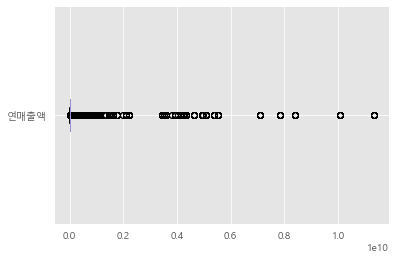

In [8]:
df[['연매출액']].plot.box(vert=False, grid=True)

In [9]:
corr = df[['연매출액', '월별_연금보험료', '월별_직원수']].corr()
corr

,연매출액,월별_연금보험료,월별_직원수
연매출액,1.00,0.73,0.64
월별_연금보험료,0.73,1.00,0.96
월별_직원수,0.64,0.96,1.00


In [10]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,연매출액,월별_연금보험료,월별_직원수
연매출액,1.00,0.73,0.64
월별_연금보험료,0.73,1.00,0.96
월별_직원수,0.64,0.96,1.00


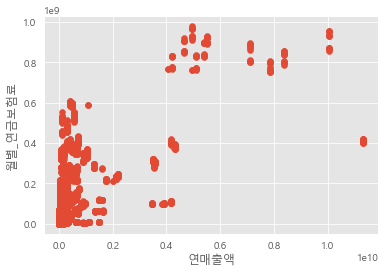

In [11]:
plt.scatter(df['연매출액'], df['월별_연금보험료'])
plt.xlabel('연매출액')
plt.ylabel('월별_연금보험료')
plt.savefig('./연매출액_월별_연금보험료_변화.png')
plt.show()

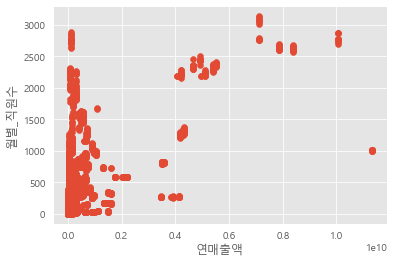

In [12]:
plt.scatter(df['연매출액'], df['월별_직원수'])
plt.xlabel('연매출액')
plt.ylabel('월별_직원수')
plt.savefig('./연매출액_월별_직원수_변화.png')
plt.show()

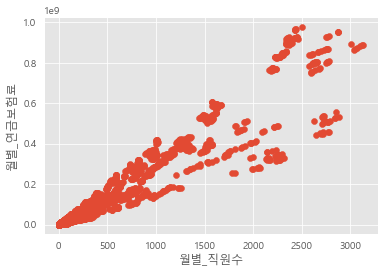

In [13]:
plt.scatter(df['월별_직원수'], df['월별_연금보험료'])
plt.xlabel('월별_직원수')
plt.ylabel('월별_연금보험료')
plt.savefig('./월별_직원수_월별_연금보험료_변화.png')
plt.show()

<AxesSubplot:title={'center':'월별_직원수 vs 월별_연금보험료'}, xlabel='월별_직원수', ylabel='월별_연금보험료'>

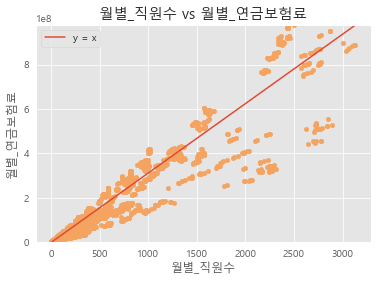

In [14]:
max_emp = df['월별_직원수'].max()

df_helper_line = pd.DataFrame({
    '월별_직원수' : [0,max_emp],
    'y = x' : [0,978067260.00]
})

ax = df.plot.scatter(x = '월별_직원수', y = '월별_연금보험료',
                       color = 'sandybrown', ylim = (0,978067260.00),
                       title = '월별_직원수 vs 월별_연금보험료')
df_helper_line.plot.line(x = '월별_직원수', y = 'y = x', ax = ax) #overlay plots


In [15]:
# 회사ID 개수 확인
len(df['회사ID'].unique())

5000

In [16]:
# 시계열 분석을 위한 '년도'+'월' =' 날짜' 변수 생성
df['날짜'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810


In [17]:
# index0 회사ID만 추출하여 추세 확인 
df_233757 = df.loc[(df["회사ID"]==233757),:].sort_values(by=['날짜'],axis=0)
print(df_233757.shape)
df_233757

(38, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
99710,233757,9835158,2015,11,2043240,10,201511
89694,233757,9835158,2015,12,2691240,15,201512
90070,233757,30229862,2016,1,2710780,15,201601
9201,233757,30229862,2016,2,2311460,13,201602
55588,233757,30229862,2016,3,2311460,13,201603
31365,233757,30229862,2016,4,3691160,17,201604
8183,233757,30229862,2016,5,3753260,19,201605
11312,233757,30229862,2016,6,4663160,23,201606
93788,233757,30229862,2016,7,5065980,24,201607
95524,233757,30229862,2016,8,5317980,25,201608


<AxesSubplot:title={'center':'233757 매출액과 직원수 변화'}, xlabel='날짜', ylabel='연매출액'>

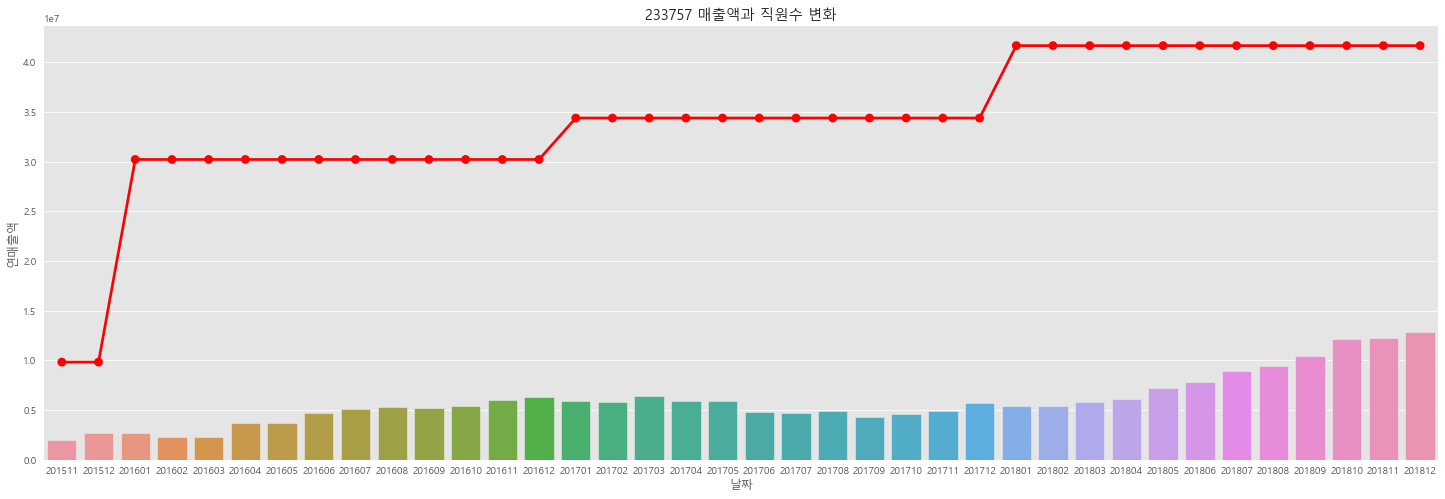

In [18]:
# 날짜에 따른 매출액과 직원수 변화 그래프
plt.figure(figsize=[25,8])
plt.title("233757 매출액과 직원수 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

ax = sns.barplot(x="날짜", y="월별_연금보험료", data=df_233757)
sns.pointplot(data=df_233757, x='날짜', y='연매출액',color='r')

### 회사 선정
 - 연매출액, 직원수, 연금보험료 상위 3개 

In [25]:
# '연매출액' 상위
df_매출 = df.sort_values(by=["연매출액"], ascending=[False])
df_매출

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
23648,63,11328779396,2018,10,414503020,996,201810
33039,63,11328779396,2018,1,403119840,1006,201801
79358,63,11328779396,2018,9,416186660,999,201809
80947,63,11328779396,2018,3,404826240,1013,201803
28110,63,11328779396,2018,5,400339640,1002,201805
...,...,...,...,...,...,...,...
7516,432911,-7882176,2017,5,2042620,6,201705
67889,432911,-7882176,2017,12,1687760,5,201712
95251,432911,-7882176,2017,8,1687760,5,201708
7617,432911,-7882176,2017,10,1687760,5,201710


In [31]:
# 연매출액 상위 5개 기업 ID 확인
df_매출_u = df_매출['회사ID'].unique()
df_매출_u

array([    63, 419945, 227415, ..., 552832,  81619, 566173], dtype=int64)

## 회사ID :  63, 419945, 227415

In [33]:
# 1. 회사 ID == 63

df_63 = df.loc[(df["회사ID"]==63),:].sort_values(by=['날짜'],axis=0)
print(df_63.shape)
df_63

(12, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
33039,63,11328779396,2018,1,403119840,1006,201801
74251,63,11328779396,2018,2,406770960,1018,201802
80947,63,11328779396,2018,3,404826240,1013,201803
80770,63,11328779396,2018,4,404211800,1012,201804
28110,63,11328779396,2018,5,400339640,1002,201805
6449,63,11328779396,2018,6,401083100,1011,201806
23302,63,11328779396,2018,7,418169080,1009,201807
52606,63,11328779396,2018,8,418292620,1011,201808
79358,63,11328779396,2018,9,416186660,999,201809
23648,63,11328779396,2018,10,414503020,996,201810


### ** 회사 ID 63은 2018년 자료뿐이라서 제외

In [36]:
# 2. 회사 ID == 419945

df_419945 = df.loc[(df["회사ID"]==419945),:].sort_values(by=['날짜'],axis=0)
print(df_419945.shape)
df_419945

(48, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
54190,419945,7108279325,2016,1,886982420,3119,201601
65941,419945,7108279325,2016,2,888827440,3133,201602
94992,419945,7108279325,2016,3,883935720,3095,201603
74830,419945,7108279325,2016,4,874397000,3070,201604
88758,419945,7108279325,2016,5,869359960,3051,201605
56393,419945,7108279325,2016,6,861583380,3040,201606
64827,419945,7108279325,2016,7,894914160,3005,201607
78098,419945,7108279325,2016,8,811429700,2782,201608
56724,419945,7108279325,2016,9,806439360,2761,201609
90522,419945,7108279325,2016,10,805976960,2772,201610


<AxesSubplot:title={'center':'419945 연매출액 변화'}, xlabel='년도', ylabel='연매출액'>

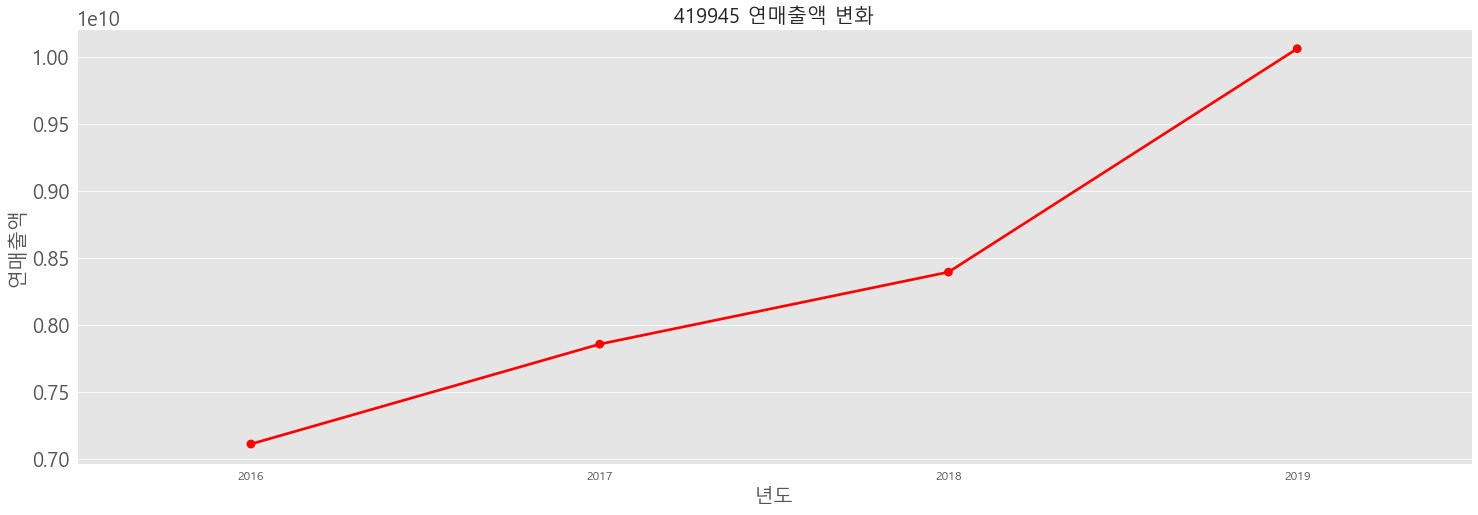

In [37]:
# 2. 날짜에 따른 연매출액 변화 그래프
plt.figure(figsize=[25,8])
plt.title("419945 연매출액 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

sns.pointplot(data=df_419945, x='년도', y='연매출액',color='r')

In [38]:
# 3. 회사 ID == 227415

df_227415 = df.loc[(df["회사ID"]==227415),:].sort_values(by=['날짜'],axis=0)
print(df_227415.shape)
df_227415

(38, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
54027,227415,4961710828,2015,11,762466900,2186,201511
4737,227415,4961710828,2015,12,761979660,2183,201512
60497,227415,5093598465,2016,1,762561880,2181,201601
48274,227415,5093598465,2016,2,766439980,2205,201602
64730,227415,5093598465,2016,3,765355120,2194,201603
66618,227415,5093598465,2016,4,764130060,2186,201604
78620,227415,5093598465,2016,5,769250540,2233,201605
90733,227415,5093598465,2016,6,769492640,2233,201606
91312,227415,5093598465,2016,7,828430540,2237,201607
93406,227415,5093598465,2016,8,833478040,2274,201608


<AxesSubplot:title={'center':'227415 연매출액 변화'}, xlabel='년도', ylabel='연매출액'>

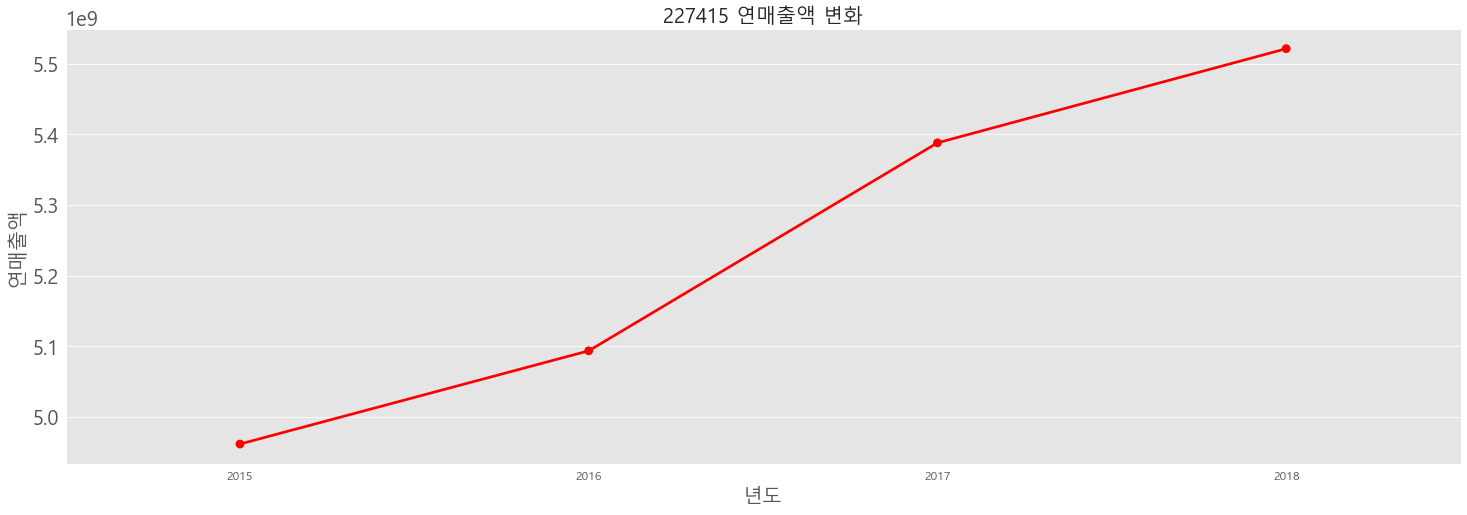

In [39]:
# 3. 날짜에 따른 연매출액 변화 그래프
plt.figure(figsize=[25,8])
plt.title("227415 연매출액 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

sns.pointplot(data=df_227415, x='년도', y='연매출액',color='r')

## ** 회사ID 63을 제외한 419945, 227415는 연매출액이 상승

## 추가작업 필요
 - 회사별 최초연도와 최근연도의 연매출액 상승률을 계산하여 상승률이 높은 기업과
 - 연금보험료 및 직원수 채용상승률(?)을 함께 고려하면 좋을 것 같음